In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [124]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [125]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Exploratory Data Analysis**

In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


<Axes: >

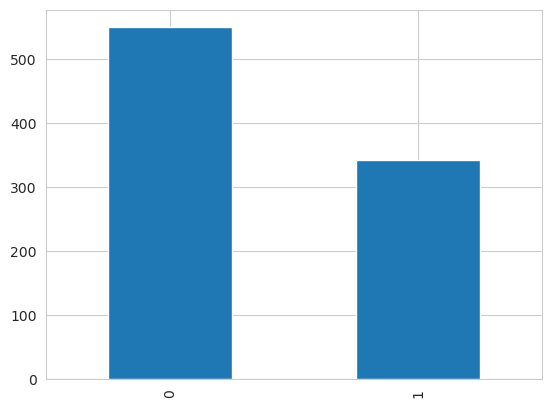

In [128]:
# show if the dataset is balance or imbalance
train['Survived'].value_counts(normalize=True)
pd.value_counts(train['Survived']).plot(kind="bar")

<Axes: >

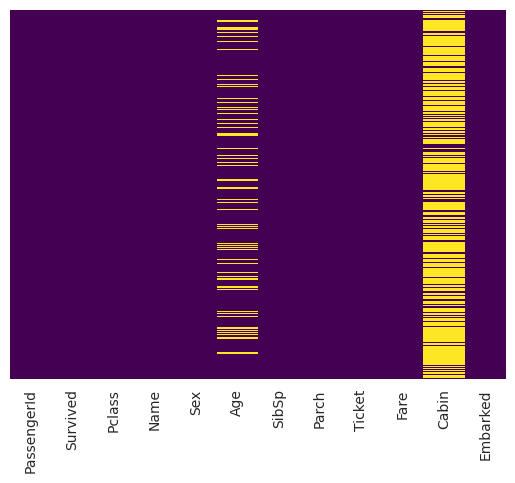

In [129]:
# see where we are missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

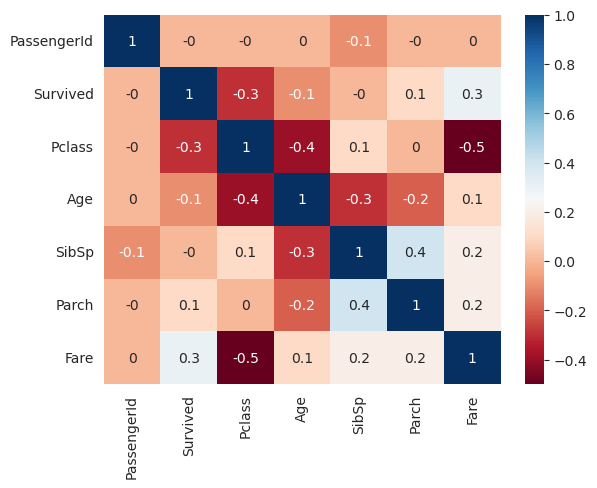

In [130]:
#show correlation matrix for all variable
correlation=train.corr().round(1)
sns.heatmap(correlation,cmap='RdBu',annot=True)
plt.show()

In [131]:
women = train.loc[train.Sex == 'female']["Survived"]
rate= sum(women)/len(women)
print("Women survived:", rate*100)

Women survived: 74.20382165605095


In [132]:
men = train.loc[train.Sex == 'male']["Survived"]
rate= sum(men)/len(men)
print("Men survived:", rate*100)

Men survived: 18.890814558058924


In [133]:
# we can see id columns is just a sequence number, so we can drop the id column
train.drop(["PassengerId"],axis=1,inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

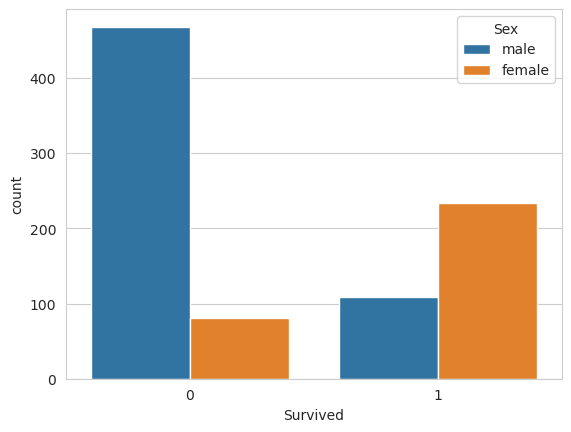

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

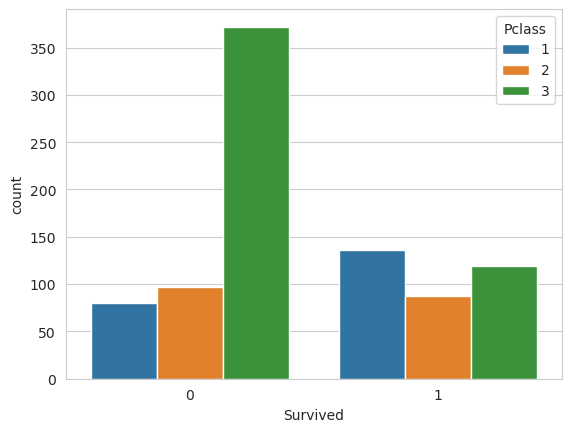

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: ylabel='Frequency'>

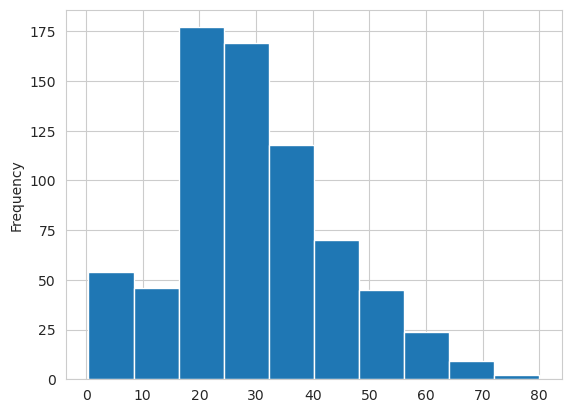

In [136]:
train['Age'].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

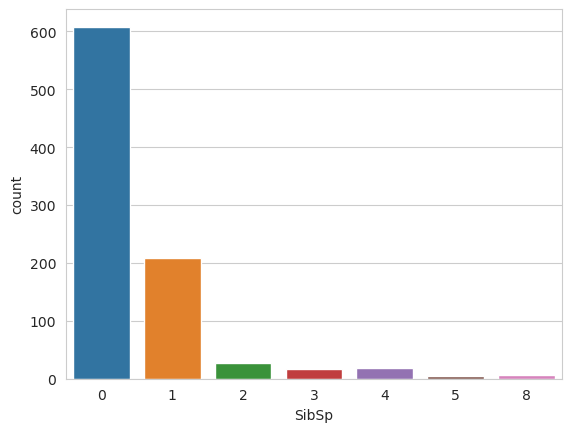

In [137]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Sex', ylabel='Age'>

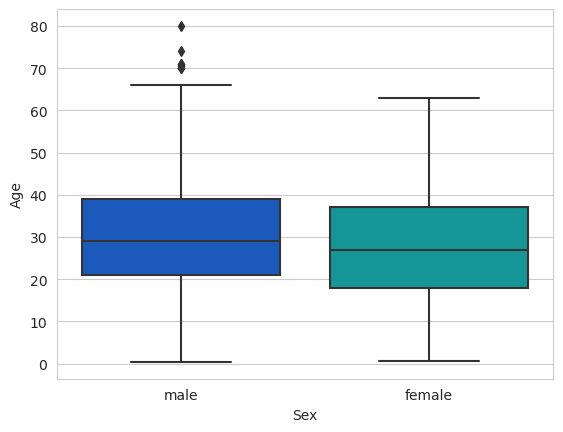

In [138]:
sns.boxplot(x='Sex',y='Age',data=train,palette='winter')

<Axes: xlabel='Pclass', ylabel='Age'>

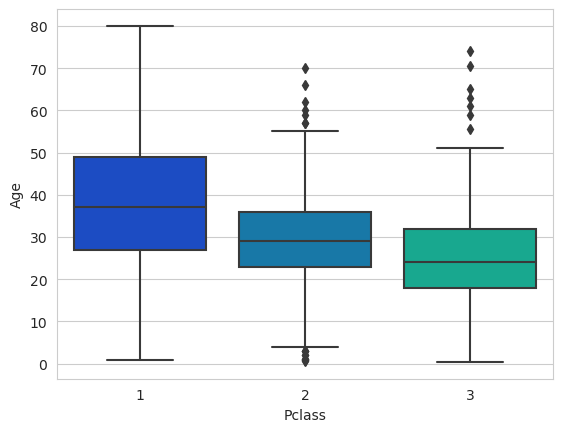

In [139]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [140]:
def inputAge(x):
    Age = x[0]
    Pclass = x[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [141]:
train['Age'] = train[['Age','Pclass']].apply(inputAge,axis=1)

<Axes: >

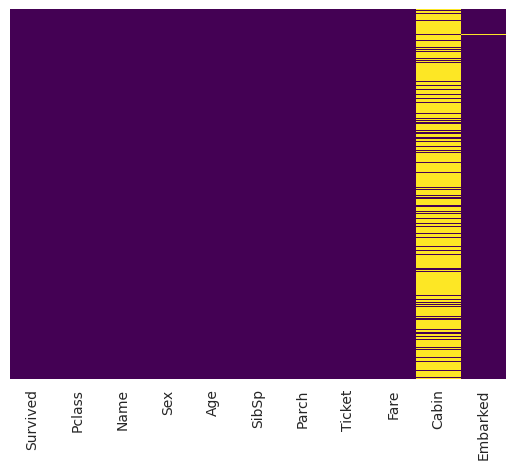

In [142]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

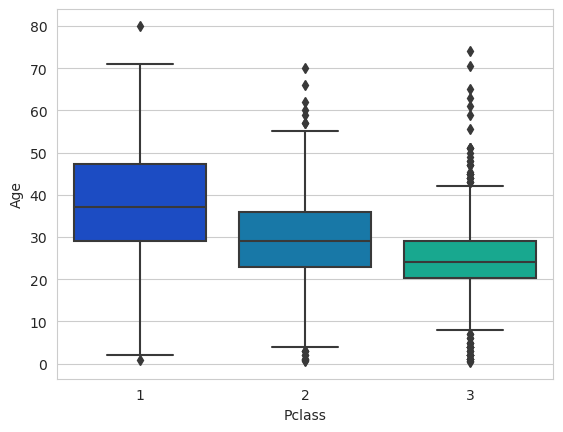

In [143]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [144]:
train.drop(["Cabin"],axis=1,inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [145]:
train.dropna(inplace=True)

<Axes: >

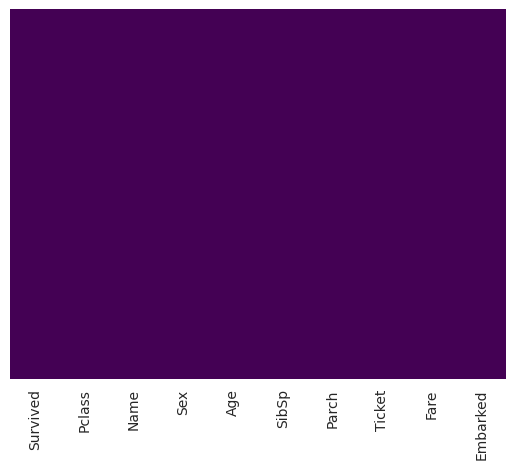

In [146]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

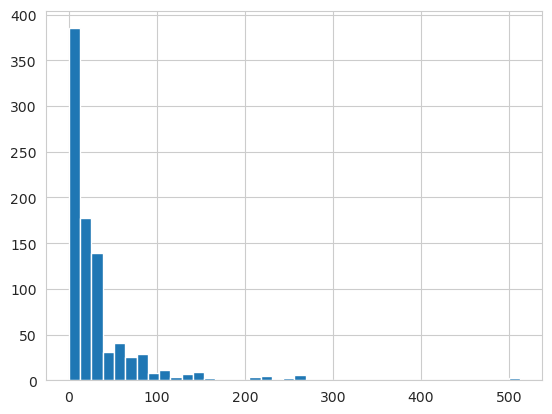

In [147]:
train['Fare'].hist(bins=40)

In [148]:
train["Sex"] = train["Sex"].replace(to_replace =['male'], value =0)
train["Sex"] = train["Sex"].replace(to_replace =['female'], value =1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [149]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [150]:
train = pd.concat([train,embark],axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1


In [151]:
train.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


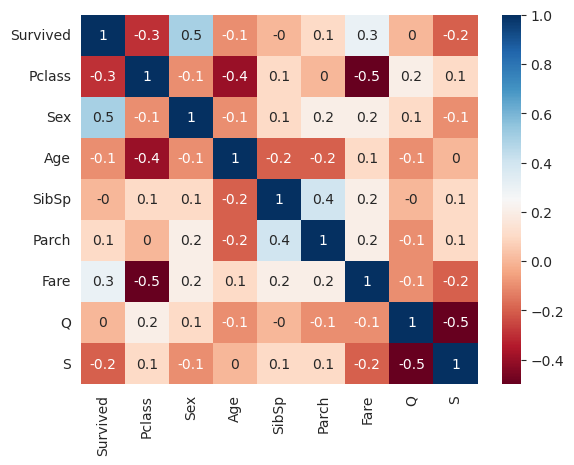

In [152]:
correlation=train.corr().round(1)
sns.heatmap(correlation,cmap='RdBu',annot=True)
plt.show()

In [154]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q','S']]
y = train[["Survived"]]

In [155]:
# split into taining (70%) and testing (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

**Logistic Regression**

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
# LogisticRegression
lr = LogisticRegression() 

# fit the model
lr.fit(X_train, y_train)

# test the model on the test data
y_pred = lr.predict(X_test)

# compute evaluation metrics
acc_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score_lr = auc(fpr, tpr)


In [160]:
# print evaluation metrics
print(f'Model: Logistic Regression')
print(f'Accuracy: {acc_lr:.3f}')
print(f'Precision: {precision_lr:.3f}')
print(f'Recall: {recall_lr:.3f}')
print(f'F1-score: {f1_lr:.3f}')
print(f'AUC: {auc_score_lr:.3f}')

Model: Logistic Regression
Accuracy: 0.794
Precision: 0.758
Recall: 0.676
F1-score: 0.715
AUC: 0.772


		  The Accuracy Score : 0.794

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       165
           1       0.76      0.68      0.72       102

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267

			Coufusion Matrix


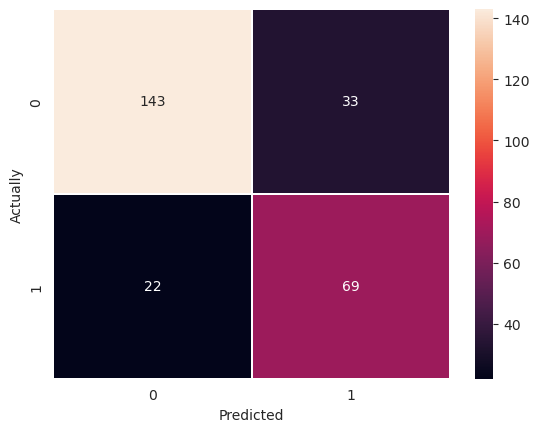

In [163]:
# print accuracy score
print(f"\t\t  The Accuracy Score : %0.3f\n" % acc_lr)
# print report precision, recall, f1 score, support
print(classification_report(y_test, y_pred))
# print confusion matrix
print(f"\t\t\tCoufusion Matrix")
sns.heatmap(confusion_matrix(y_pred, np.array(y_test)),fmt=".0f", 
            annot=True,linewidths=0.2, xticklabels= ["0", "1"],
       yticklabels= ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actually")
plt.show()

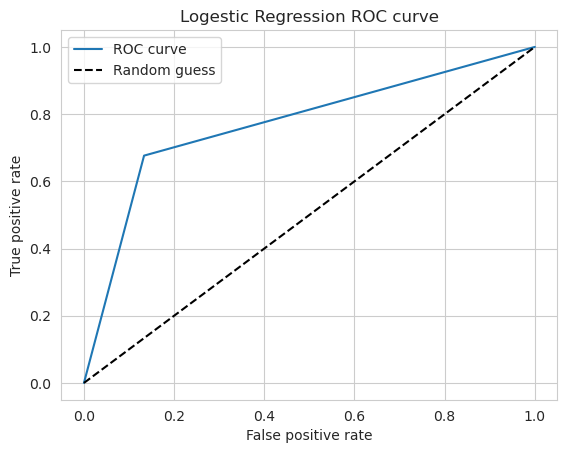

In [162]:
# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'Logestic Regression ROC curve')
plt.legend()
plt.show()